To get to these coordinate on Google Maps, type the latitude and longitude in decimal in the search box or use:
https://www.google.com/maps/place/72%C2%B018'00.0%22S+170%C2%B013'00.1%22E/@-72.3,170.216694,17z/data=!3m1!4b1!4m2!3m1!1s0x0:0x0

<span style="color:red">HW questions</span>

1. Waiting for somebody to write a script that will do that automatically from python
2. Can you create a map where the denity of points is represented as a density map (topographical map)?
3. Can you create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.)? What conclusions can you draw from this map?


In [ ]:
from googlemaps import GoogleMaps
gmaps = GoogleMaps(api_key)
destination = gmaps.latlng_to_address(38.887563, -77.019929)
print destination

###Lecture3_Exercises

**Economics dataset analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary

**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Quarterly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly
                            
** Variable Description **

                            Series                        Description
                            Treated                       Dummy indicating whether the candidate received the treatment
                            Age                           Age in years
                            Education (years)             Years of Education
                            Black                         Dummy indicating African-American
                            Hispanic                      Dummy indicating Hispanic
                            Married                       Dummy indicating married
                            Real income Before ($)        Income before program
                        Real income After ($)         Income after program           


In [1]:
%cd ~/Documents/DSE/phesami/DSE200/data/economics/
import os
import pandas as pd
Data_Eco=pd.DataFrame(data=None,columns=['DATE'])
for files in os.listdir('.'):
    if os.path.isfile(files) and not files.endswith(".DS_Store"):
        header=['DATE',os.path.splitext(files)[0]]
        Data_Eco_tmp = pd.read_csv(files, header=None, names=header)
        Data_Eco_tmp = Data_Eco_tmp.sort(columns='DATE')
        Data_Eco=Data_Eco.merge(Data_Eco_tmp, on='DATE', how='outer')
Data_Eco=Data_Eco.iloc[:-1]
Data_Eco

/Users/phesami/Documents/DSE/phesami/DSE200/data/economics


,DATE,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE
0,1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN
1,1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN
2,1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN
3,1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN
4,1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN
5,1919-06-01,5.40,7.04,NaN,NaN,NaN,NaN,4.9119,NaN
6,1919-07-01,5.44,7.06,NaN,NaN,NaN,NaN,5.2071,NaN
7,1919-08-01,5.56,7.13,NaN,NaN,NaN,NaN,5.2876,NaN
8,1919-09-01,5.60,7.27,NaN,NaN,NaN,NaN,5.1803,NaN
9,1919-10-01,5.54,7.34,NaN,NaN,NaN,NaN,5.1266,NaN


In [2]:
Data_Eco['term_premium']=Data_Eco['GS10'].convert_objects(convert_numeric=True) - Data_Eco['GS1'].convert_objects(convert_numeric=True)
Data_Eco['default_premium']=Data_Eco['BAA'].convert_objects(convert_numeric=True) - Data_Eco['AAA'].convert_objects(convert_numeric=True)
Data_Eco

,DATE,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,term_premium,default_premium
0,1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN,NaN,1.77
1,1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN,NaN,1.85
2,1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN,NaN,1.76
3,1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN,NaN,1.79
4,1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN,NaN,1.70
5,1919-06-01,5.40,7.04,NaN,NaN,NaN,NaN,4.9119,NaN,NaN,1.64
6,1919-07-01,5.44,7.06,NaN,NaN,NaN,NaN,5.2071,NaN,NaN,1.62
7,1919-08-01,5.56,7.13,NaN,NaN,NaN,NaN,5.2876,NaN,NaN,1.57
8,1919-09-01,5.60,7.27,NaN,NaN,NaN,NaN,5.1803,NaN,NaN,1.67
9,1919-10-01,5.54,7.34,NaN,NaN,NaN,NaN,5.1266,NaN,NaN,1.80


Populating the interactive namespace from numpy and matplotlib


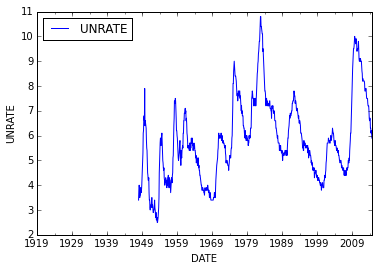

In [3]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%pylab inline
Data_Eco['DATE']=Data_Eco.apply(lambda x:pd.to_datetime(x))
Data_Eco['DATE'] = Data_Eco['DATE'].convert_objects(convert_numeric=True)
Data_Eco['UNRATE'] = Data_Eco['UNRATE'].convert_objects(convert_numeric=True)
Data_Eco.plot(x='DATE', y='UNRATE')
xlabel('DATE')
ylabel('UNRATE')

In [4]:
Data_Eco['GDP_growth']= Data_Eco['GDPC1'].pct_change(fill_method=None)
Data_Eco['GDPC1']

TypeError: unsupported operand type(s) for /: 'str' and 'float'

**Nutrition dataset analysis**

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json
> db = json.load(open('foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

And the images can be visualized as follows

In [ ]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

1. Visualize the first 15 digits to get a better understanding of the data
2. With x as data and y as target, classify the above datasets into individual targets using a decision tree
3. Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?
4. Perform this classification task with sklearn.ensemble.RandomForestClassifier. Write in the markdown below the impact each of the parammeter had on the result



        1. max_depth: 
        2. max_features:
        3. n_estimators:



Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. Output the best F1 score that you achieve. 



**Dimensionality Reduction - PCA**

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. 

Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
Use the sklearn inbuilt tool sklearn.decomposition.PCA

Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the ammount of information thrown away and plot the variance(cumulative) against the number of components  

Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA  as well 
(this extended analysis need not be submitted as part of homework)
